We will answer the next questions:
- How many respondents took the survey?
- How many respondents answered all the questions?
- What are the central tendency measures for the respondents' experience (WorkExp)?
- How many respondents work remotely?
- What percentage of respondents code in Python?
- How many respondents learned programming through online courses?
- Among the respondents who code in Python grouped by countries, what is the average and median annual compensation (ConvertedCompYearly) in each country?
- What education levels do the 5 respondents with the highest compensation have?
- In each age category, what percentage of respondents code in Python?
- Among the respondents who are in the 75th percentile for average compensation and work remotely, which industries are the most prevalent?
- Build different charts to analyze survey

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'survey_results_public.csv')

How many respondents took the survey?

In [3]:
responses = len(pd.unique(df['ResponseId']))
print(f'Number of Responses: {responses}')

Number of Responses: 89184


How many respondents answered all the questions?

In [4]:
answered_all_questions = len(df[~df.isnull().any(axis=1)])
print(f'Number of Users Answered All the Questions: {answered_all_questions}')

Number of Users Answered All the Questions: 0


What are the central tendency measures for the respondents' experience?

In [5]:
df['WorkExp'].describe()

count    43579.000000
mean        11.405126
std          9.051989
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         50.000000
Name: WorkExp, dtype: float64

How many respondents work remotely?

In [6]:
working_remotely = df['RemoteWork'].value_counts()['Remote']
print(f'Remote Working (Without Hybrid): {working_remotely}')

Remote Working (Without Hybrid): 30566


What percentage of respondents code in Python?

In [7]:
python_percentage = df['LanguageHaveWorkedWith'].str.contains('Python', na=False).sum() / responses * 100
print(f'Percentage of Users that have to use Python: {round(python_percentage, 2)}%')

Percentage of Users that have to use Python: 48.39%


How many respondents learned programming through online courses?

In [8]:
num_online_learners = df['LearnCode'].str.contains('Online Courses', na=False).sum()
print(f"Number of Users that Learned on Online Courses: {num_online_learners}")

Number of Users that Learned on Online Courses: 43201


Among the respondents who code in Python grouped by countries, what is the average and median annual compensation (ConvertedCompYearly) in each country?

In [9]:
df[df['LanguageHaveWorkedWith'].str.contains('Python', na=False)].groupby('Country')['ConvertedCompYearly'].agg(
    ['mean', 'median'])

,mean,median
Country,,
Afghanistan,665.000000,48.0
Albania,28008.600000,11844.0
Algeria,8336.333333,6586.0
Andorra,32127.000000,32127.0
Angola,662.000000,662.0
...,...,...
"Venezuela, Bolivarian Republic of...",24973.529412,12000.0
Viet Nam,20191.870370,13401.0
Yemen,8373.000000,9000.0


What education levels do the 5 respondents with the highest compensation have?

In [10]:
df.sort_values('ConvertedCompYearly', ascending=False)[['EdLevel', 'ConvertedCompYearly']].head(5)

,EdLevel,ConvertedCompYearly
53268,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",74351432.0
77848,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",73607918.0
66223,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",72714292.0
28121,Primary/elementary school,57513831.0
19679,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",36573181.0


In each age category, what percentage of respondents code in Python?

In [11]:
df['has_python'] = df['LanguageHaveWorkedWith'].apply(lambda x: 'Python' in (x if pd.notnull(x) else ""))

python_percentage_by_age = (df.groupby('Age')['has_python'].mean() * 100).round(2)
python_percentage_by_age

Age
18-24 years old       61.39
25-34 years old       47.58
35-44 years old       41.44
45-54 years old       38.46
55-64 years old       36.50
65 years or older     30.91
Prefer not to say     41.20
Under 18 years old    68.63
Name: has_python, dtype: float64

Among the respondents who are in the 75th percentile for average compensation and work remotely, which industries are the most prevalent?

In [12]:
high_salary_df = df[
    (df['RemoteWork'] == 'Remote') & (df['ConvertedCompYearly'] >= df['ConvertedCompYearly'].quantile(0.75))]


industry_counts = high_salary_df['Industry'].value_counts().head(5)
industry_counts

Information Services, IT, Software Development, or other Technology    1800
Financial Services                                                      535
Other                                                                   441
Healthcare                                                              365
Retail and Consumer Services                                            243
Name: Industry, dtype: int64

What is the education level of the respondents?

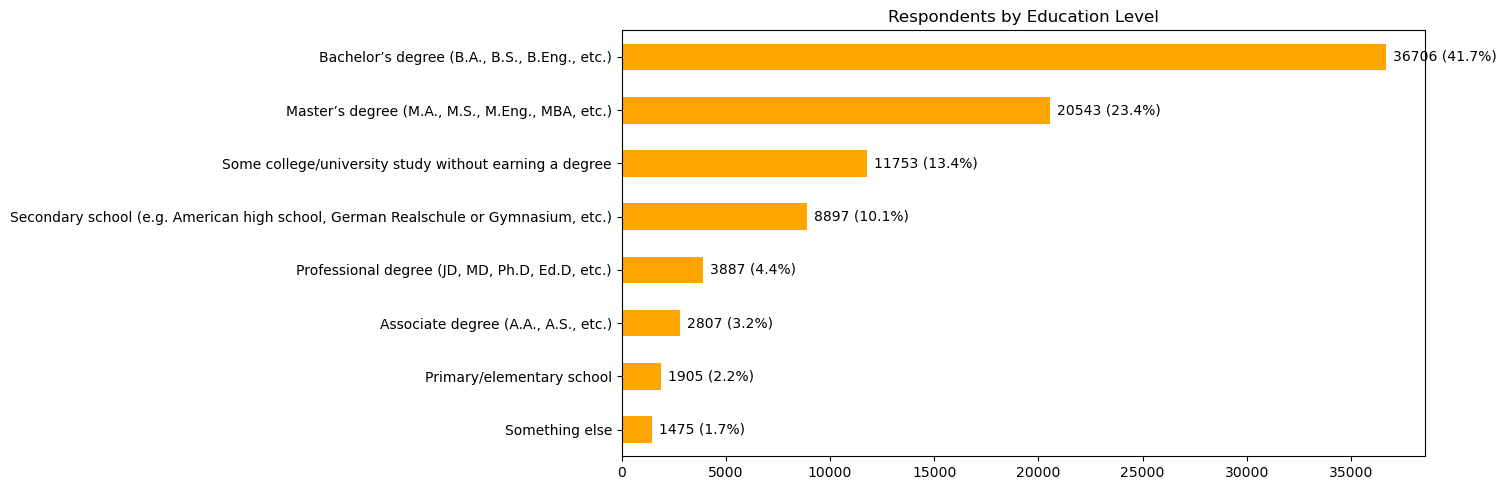

In [13]:
ed_level_counts = df.groupby('EdLevel')['ResponseId'].count().sort_values(ascending=True)

total_responses = ed_level_counts.sum()

ax = ed_level_counts.plot(kind='barh', figsize=(15, 5), color='orange')
plt.title('Respondents by Education Level')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    percentage = f"{100 * p.get_width() / total_responses:.1f}%"
    ax.annotate(f"{p.get_width()} ({percentage})", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left',
                va='center', xytext=(5, 0), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

How did the respondents learn to code?

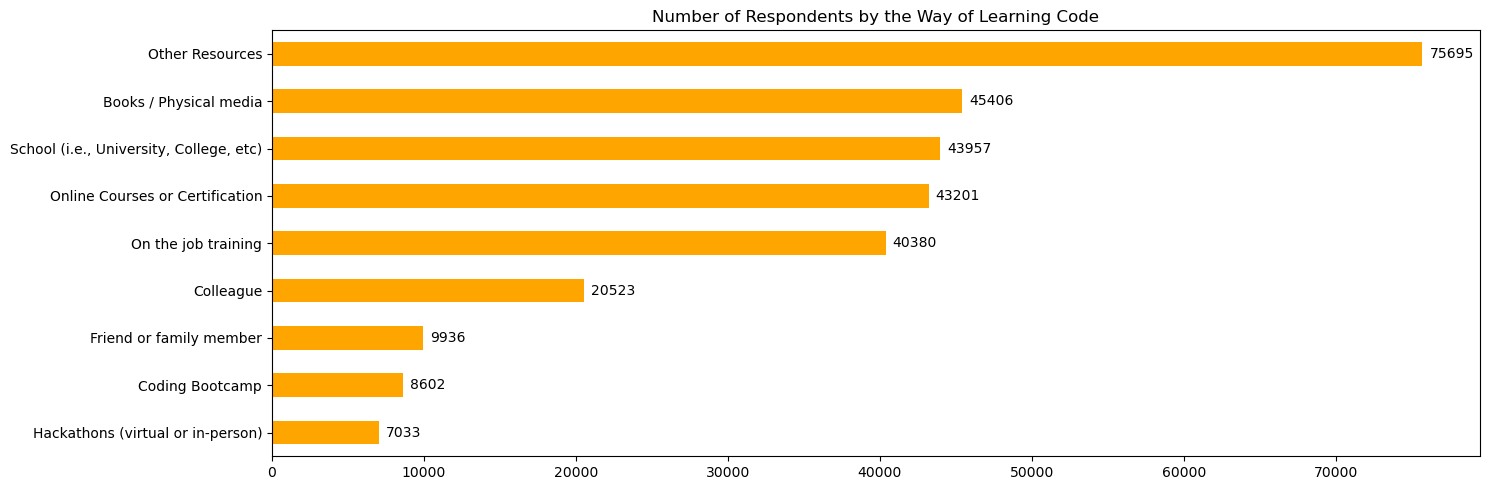

In [14]:
learn_methods = df['LearnCode'].str.split(';').explode()
learn_methods = learn_methods.replace(to_replace=r'.*Other.*', value='Other Resources', regex=True)
learn_counts = learn_methods.value_counts().sort_values(ascending=True)

ax = learn_counts.plot(kind='barh', figsize=(15, 5), color='orange')
plt.title('Number of Respondents by the Way of Learning Code')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    ax.annotate(f"{p.get_width()}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center',
                xytext=(5, 0), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Which online resources did the respondents use to learn programming?

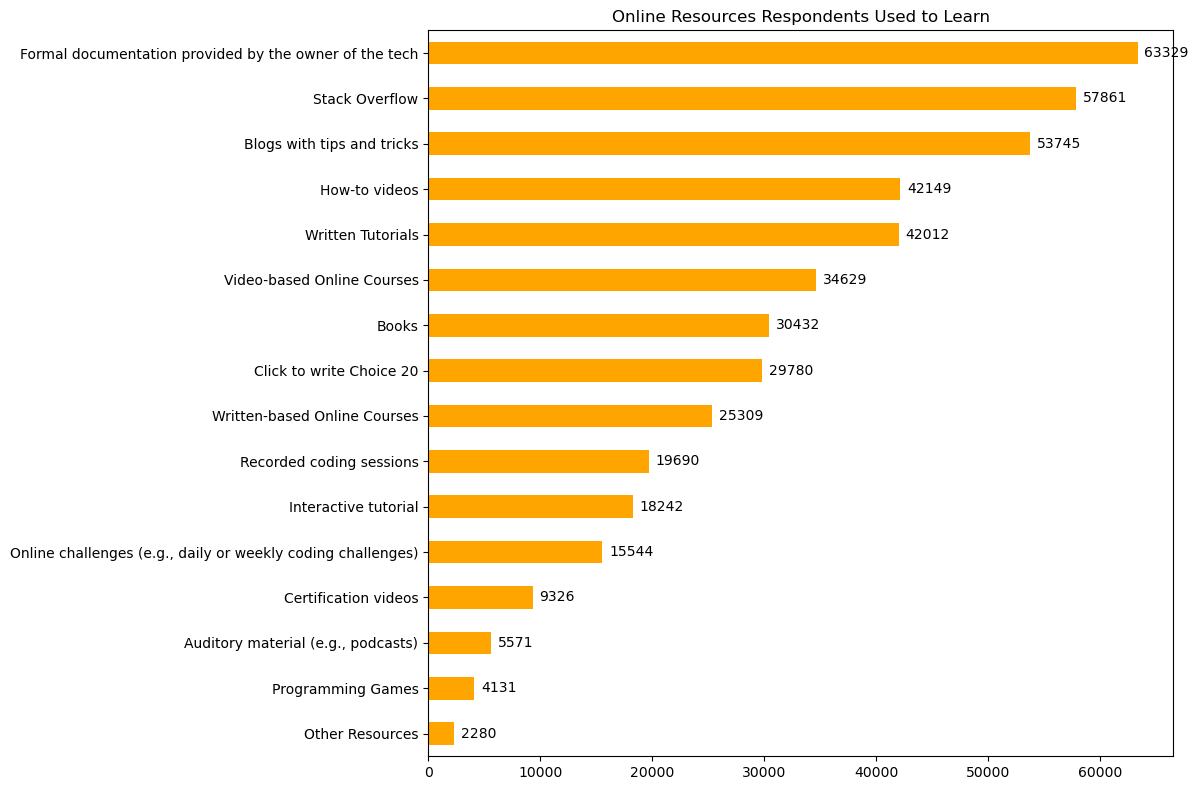

In [15]:
learn_methods = df['LearnCodeOnline'].str.split(';').explode()
learn_methods = learn_methods.replace(to_replace=r'.*Other.*', value='Other Resources', regex=True)
learn_counts = learn_methods.value_counts().sort_values(ascending=True)

ax = learn_counts.plot(kind='barh', figsize=(12, 8), color='orange')
plt.title('Online Resources Respondents Used to Learn')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    ax.annotate(f"{p.get_width()}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center',
                xytext=(5, 0), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

What is the coding experience of the Respondents?

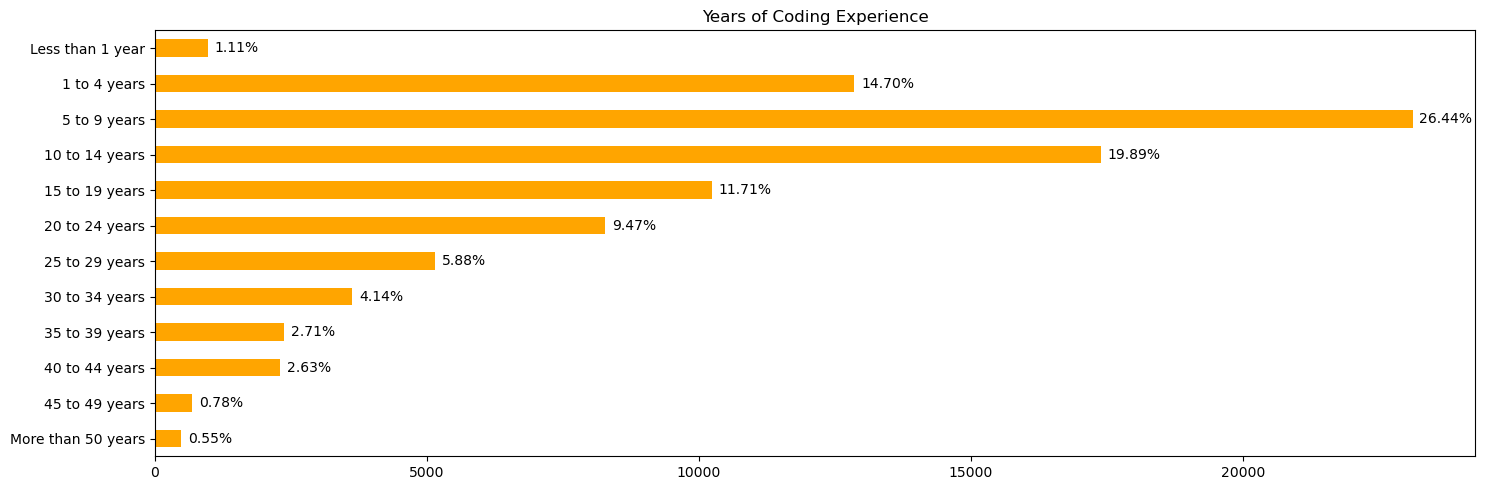

In [16]:
df['YearsCode'] = df['YearsCode'].replace({'Less than 1 year': 0, 'More than 50 years': 51}).astype(float)

total_responses = df['YearsCode'].count()

bins = [-1, 0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 51]
labels = ['Less than 1 year', '1 to 4 years', '5 to 9 years', '10 to 14 years',
          '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years',
          '35 to 39 years', '40 to 44 years', '45 to 49 years', 'More than 50 years']

df['YearsCodeBinned'] = pd.cut(df['YearsCode'], bins=bins, labels=labels, right=True)

years_counts = df['YearsCodeBinned'].dropna().value_counts().reindex(labels[::-1]).fillna(0)

ax = years_counts.plot(kind='barh', figsize=(15, 5), color='orange')
plt.title('Years of Coding Experience')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    percentage = f"{100 * p.get_width() / total_responses:.2f}%"
    ax.annotate(f"{percentage}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

What is the professional coding experience of the Respondents?

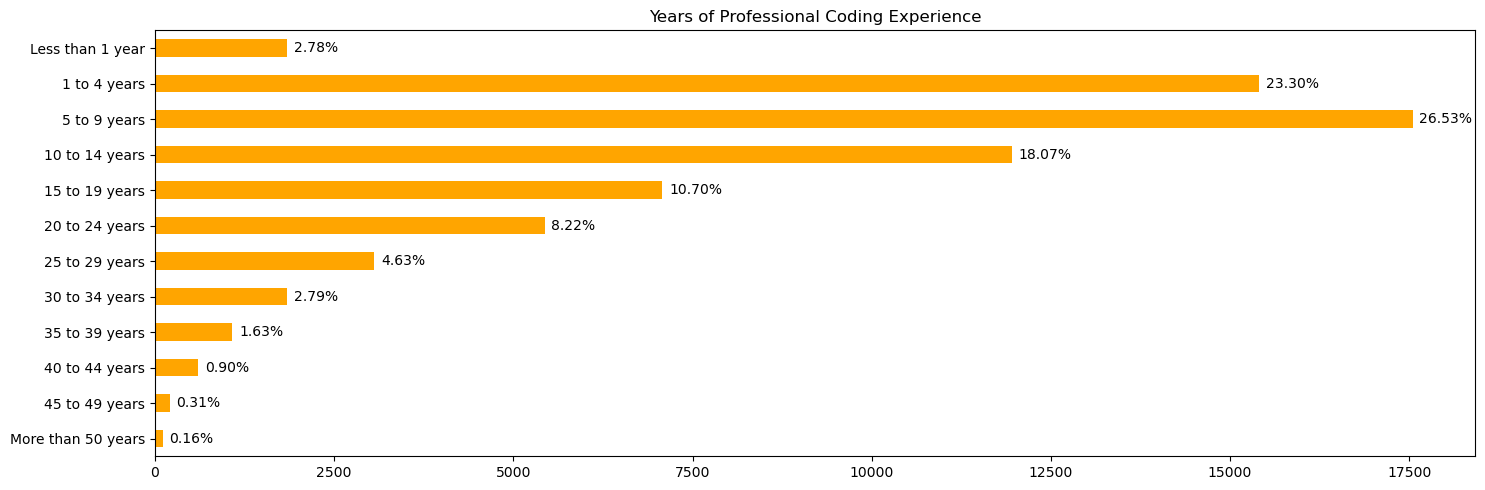

In [17]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}).astype(float)

total_responses = df['YearsCodePro'].count()

bins = [-1, 0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 51]
labels = ['Less than 1 year', '1 to 4 years', '5 to 9 years', '10 to 14 years',
          '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years',
          '35 to 39 years', '40 to 44 years', '45 to 49 years', 'More than 50 years']

df['YearsCodeBinned'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True)

years_counts = df['YearsCodeBinned'].dropna().value_counts().reindex(labels[::-1]).fillna(0)

ax = years_counts.plot(kind='barh', figsize=(15, 5), color='orange')
plt.title('Years of Professional Coding Experience')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    percentage = f"{100 * p.get_width() / total_responses:.2f}%"
    ax.annotate(f"{percentage}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

What is the professional coding experience of the Respondents by developer type?

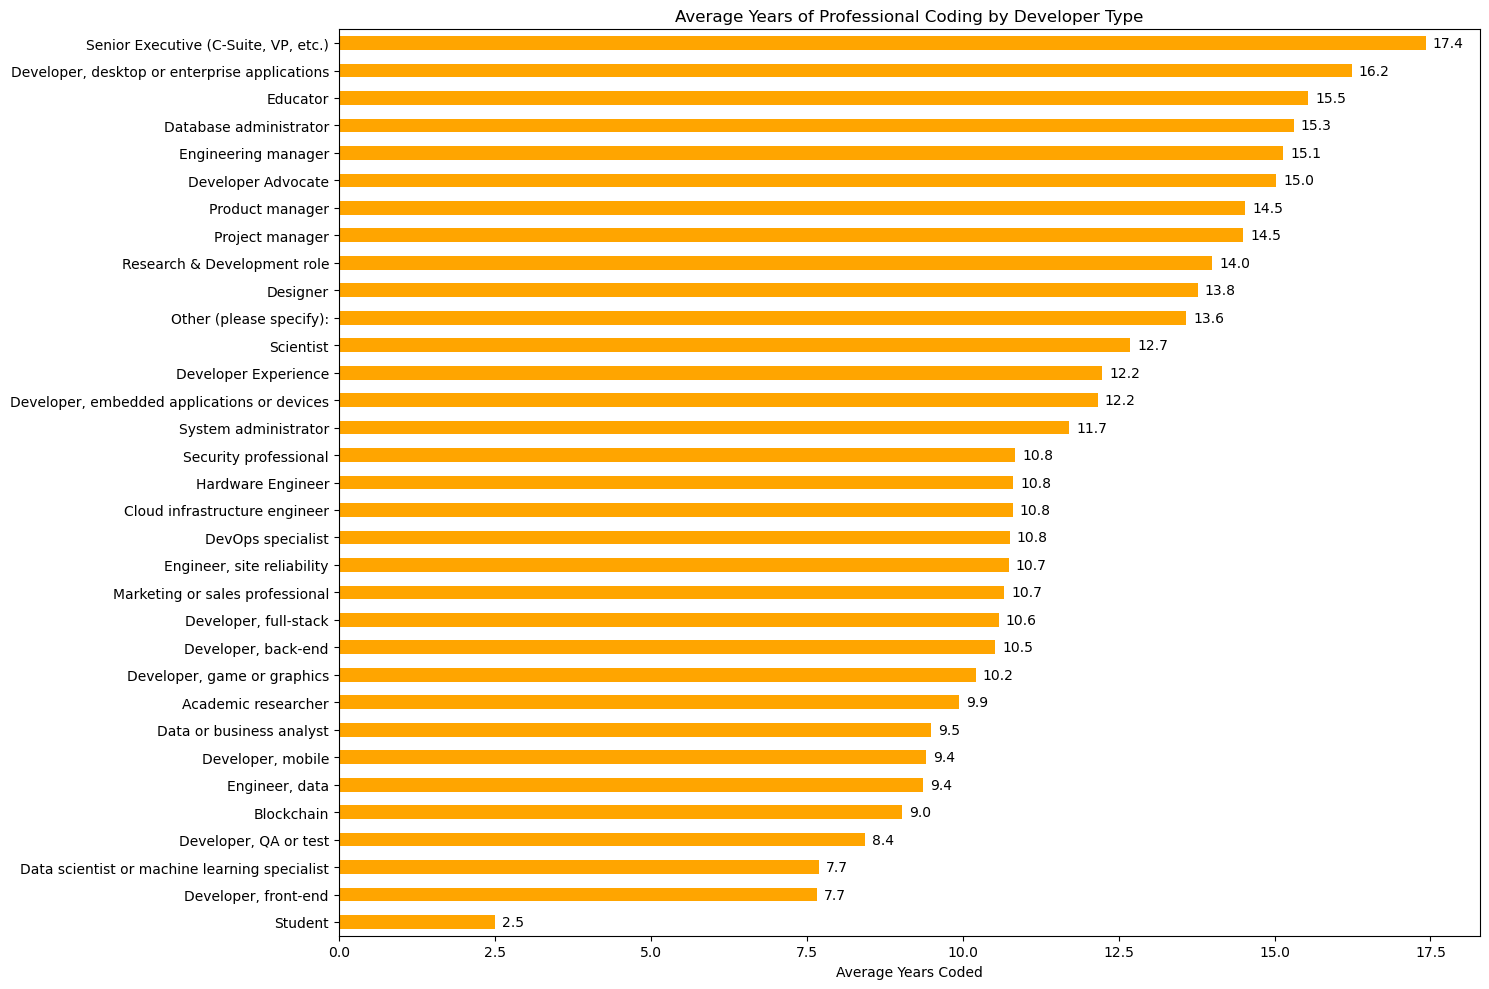

In [18]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}).astype(float)

mean_years = df.groupby('DevType')['YearsCodePro'].mean().sort_values()

ax = mean_years.plot(kind='barh', figsize=(15, 10), color='orange')
plt.title('Average Years of Professional Coding by Developer Type')
plt.xlabel('Average Years Coded')
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    ax.annotate(f"{p.get_width():.1f}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center',
                xytext=(5, 0), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

What is the structure of the respondents by developer type?

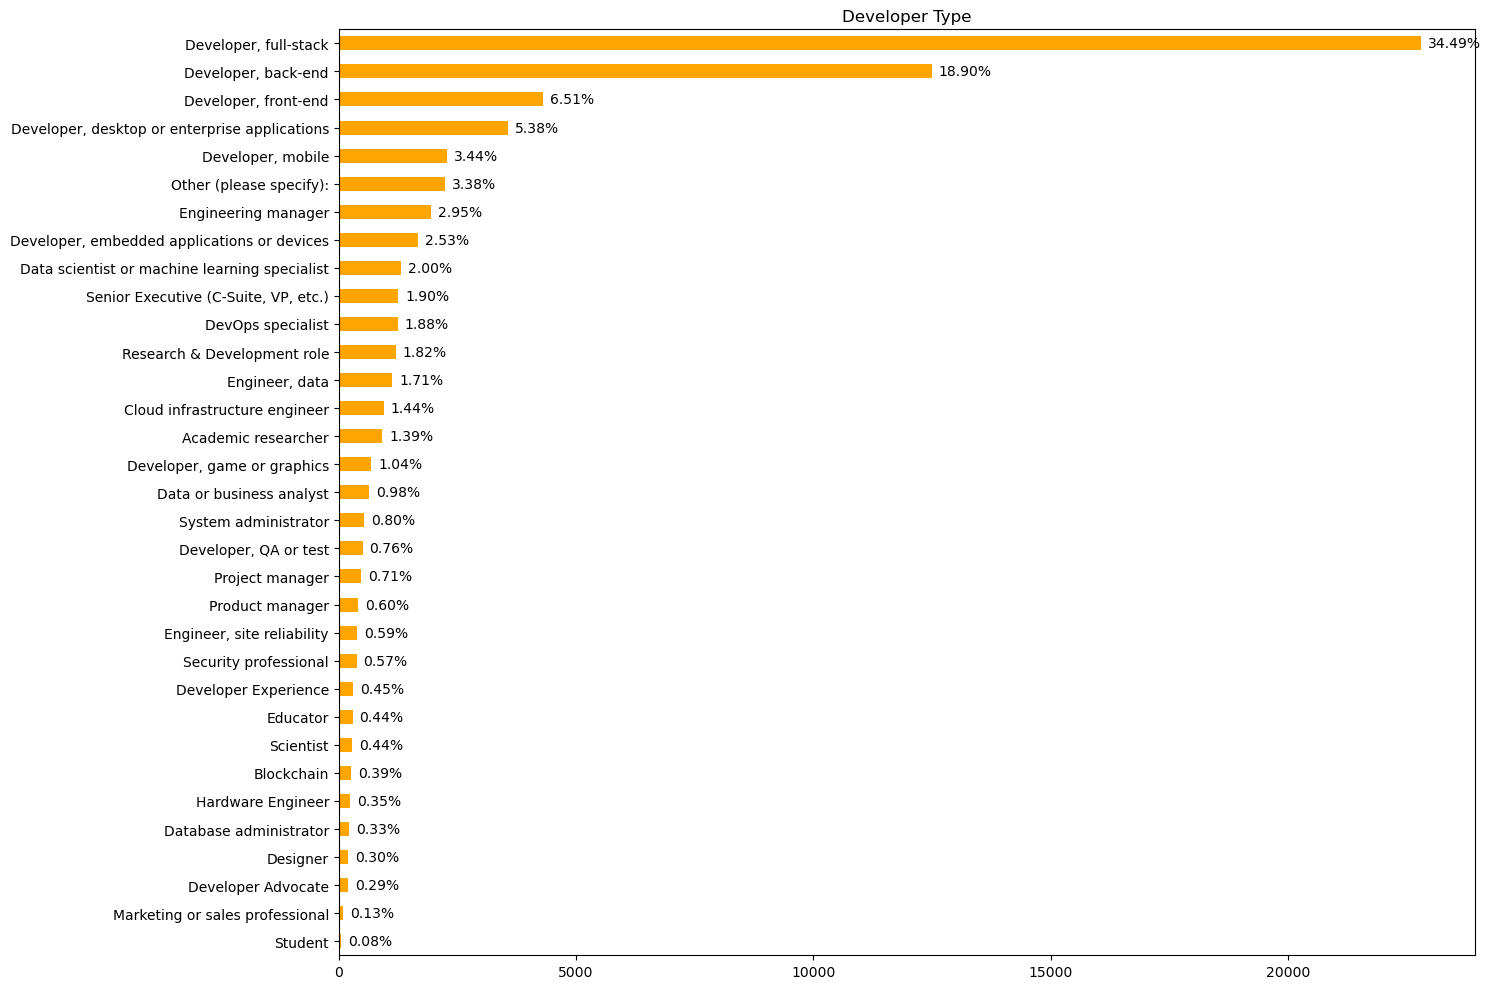

In [19]:
developer_types = df.groupby('DevType')['YearsCodePro'].count().sort_values()
total_responses = total_responses.sum()

ax = developer_types.plot(kind='barh', figsize=(15, 10), color='orange')
plt.title('Developer Type')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    percentage = f"{100 * p.get_width() / total_responses:.2f}%"
    ax.annotate(f"{percentage}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

What are the top 10 countries by the number of respondents?

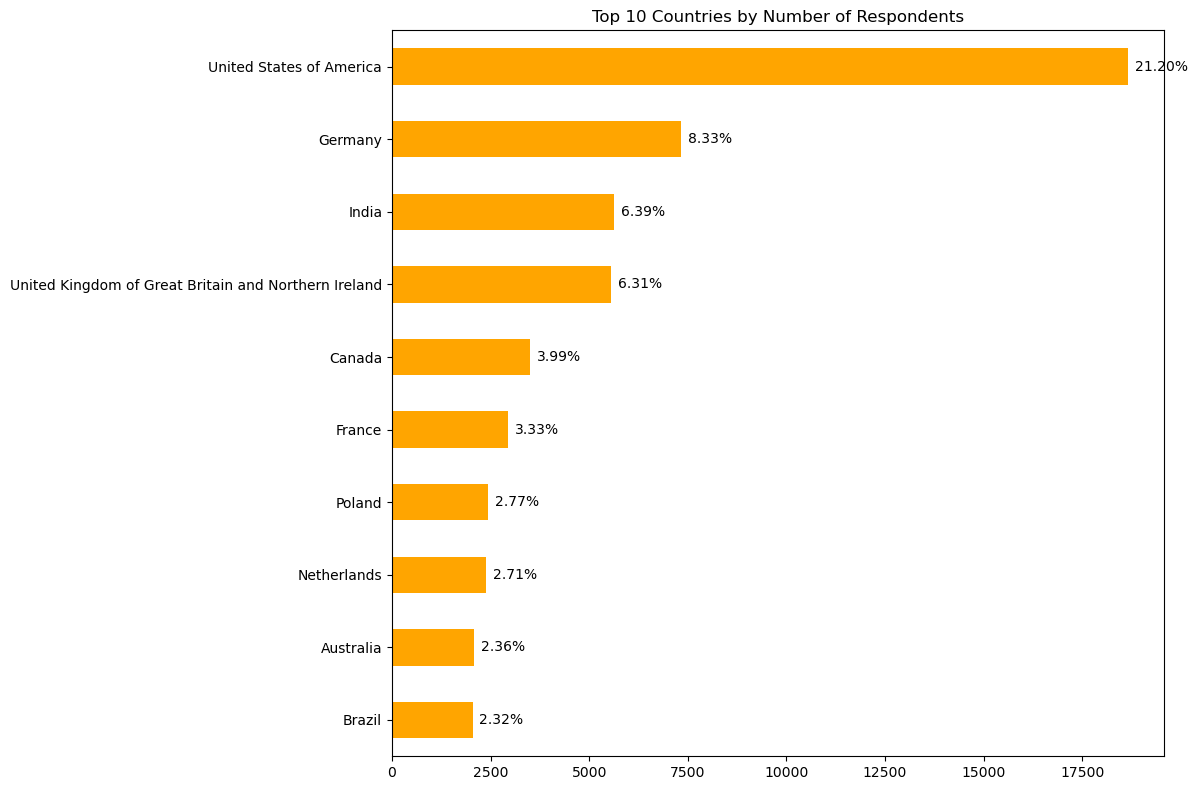

In [20]:
country_counts = df['Country'].value_counts()
top_countries = country_counts.head(10).sort_values(ascending=True)

total_respondents = country_counts.sum()
percentages = (top_countries / total_respondents) * 100

ax = top_countries.plot(kind='barh', figsize=(12, 8), color='orange')
plt.title('Top 10 Countries by Number of Respondents')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    percentage = f"{100 * p.get_width() / total_respondents:.2f}%"
    ax.annotate(f"{percentage}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

What is the demographic of the respondents?

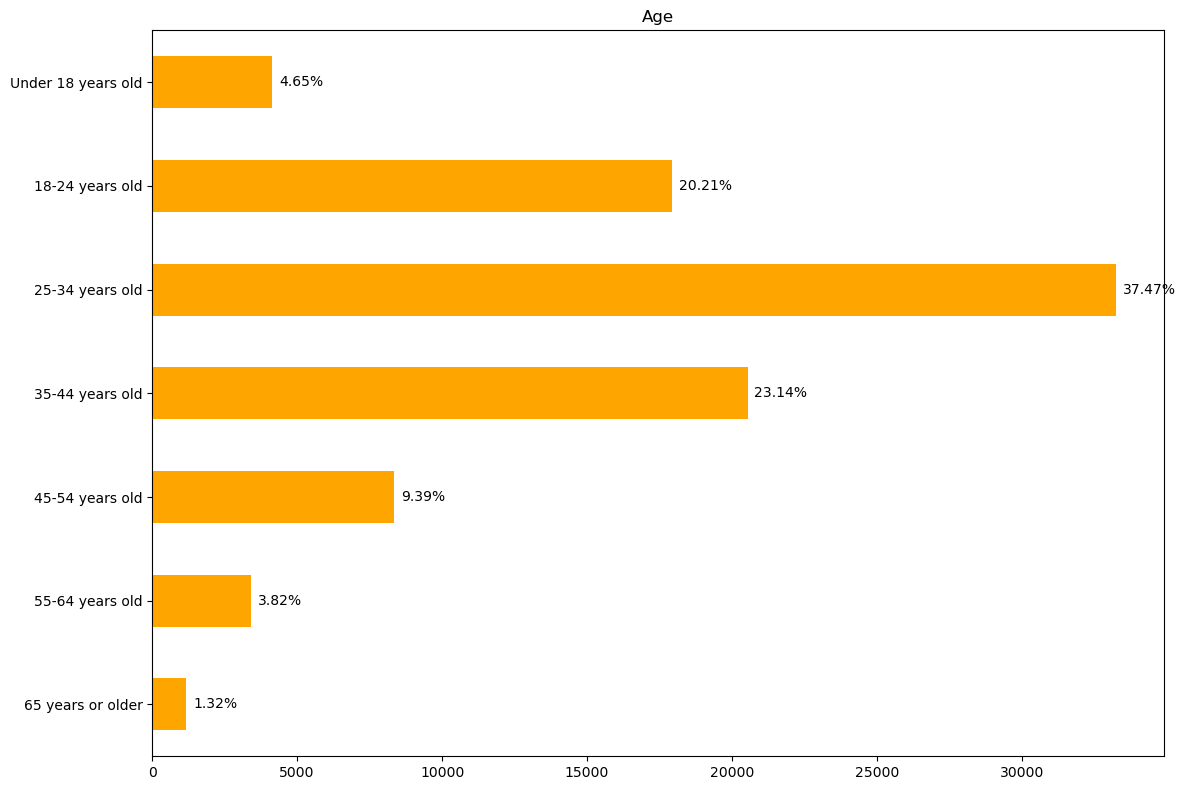

In [21]:
age_counts = df['Age'].value_counts()

custom_order = ['65 years or older', '55-64 years old', '45-54 years old', '35-44 years old', '25-34 years old',
                '18-24 years old', 'Under 18 years old']

age_counts = age_counts.reindex(custom_order)

total_respondents = age_counts.sum()

ax = age_counts.plot(kind='barh', figsize=(12, 8), color='orange')
plt.title('Age')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    percentage = f"{100 * p.get_width() / total_respondents:.2f}%"
    ax.annotate(f"{percentage}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Which languages are used most frequently and which are not?

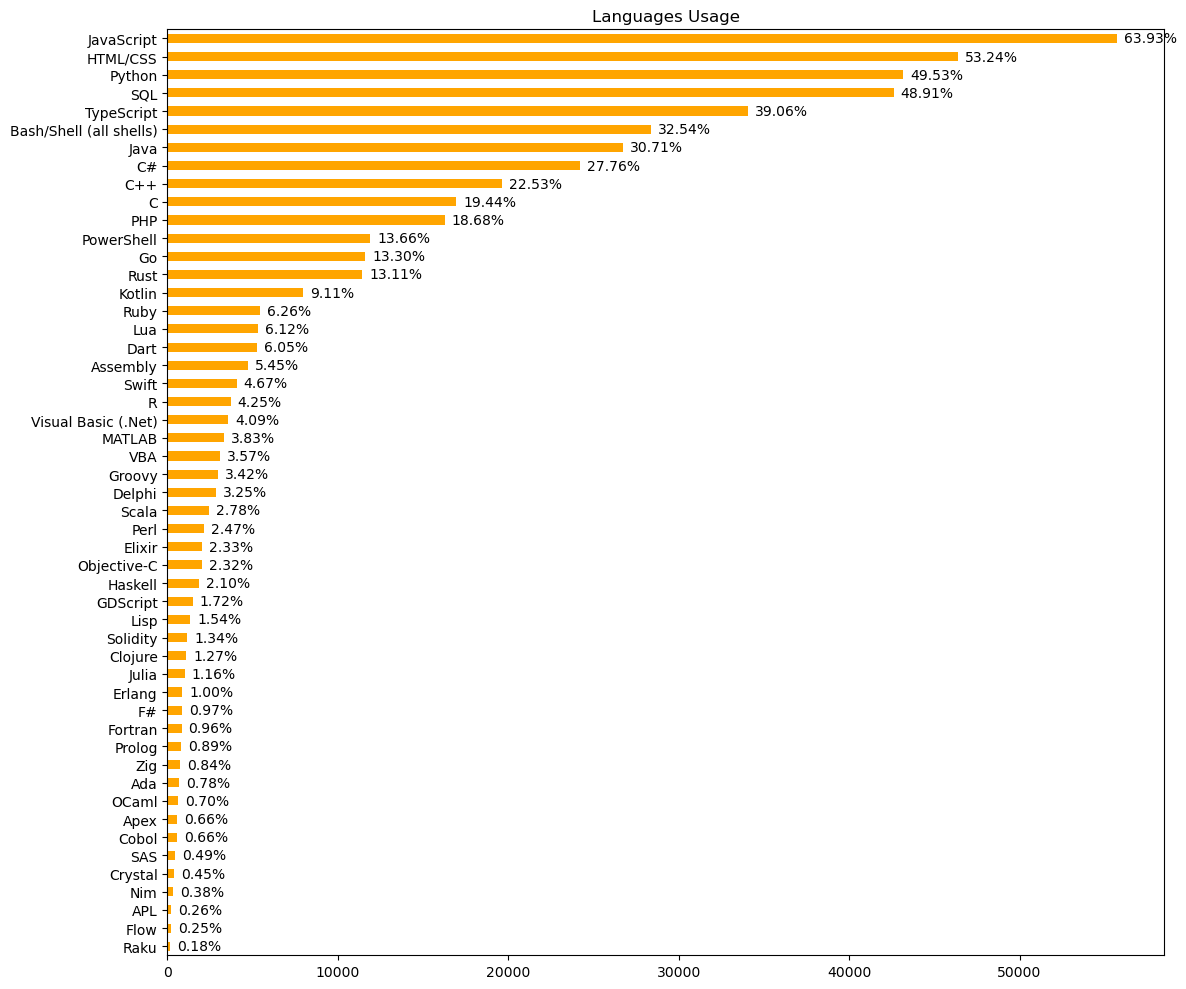

In [22]:
languages = df['LanguageHaveWorkedWith'].str.split(';').explode()
languages_counts = languages.value_counts().sort_values(ascending=True)
total_respondents = df['LanguageHaveWorkedWith'].notna().sum()

ax = languages_counts.plot(kind='barh', figsize=(12, 10), color='orange')
plt.title('Languages Usage')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    percentage = f"{100 * p.get_width() / total_respondents:.2f}%"
    ax.annotate(f"{percentage}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Which databases are used most frequently and which are not?

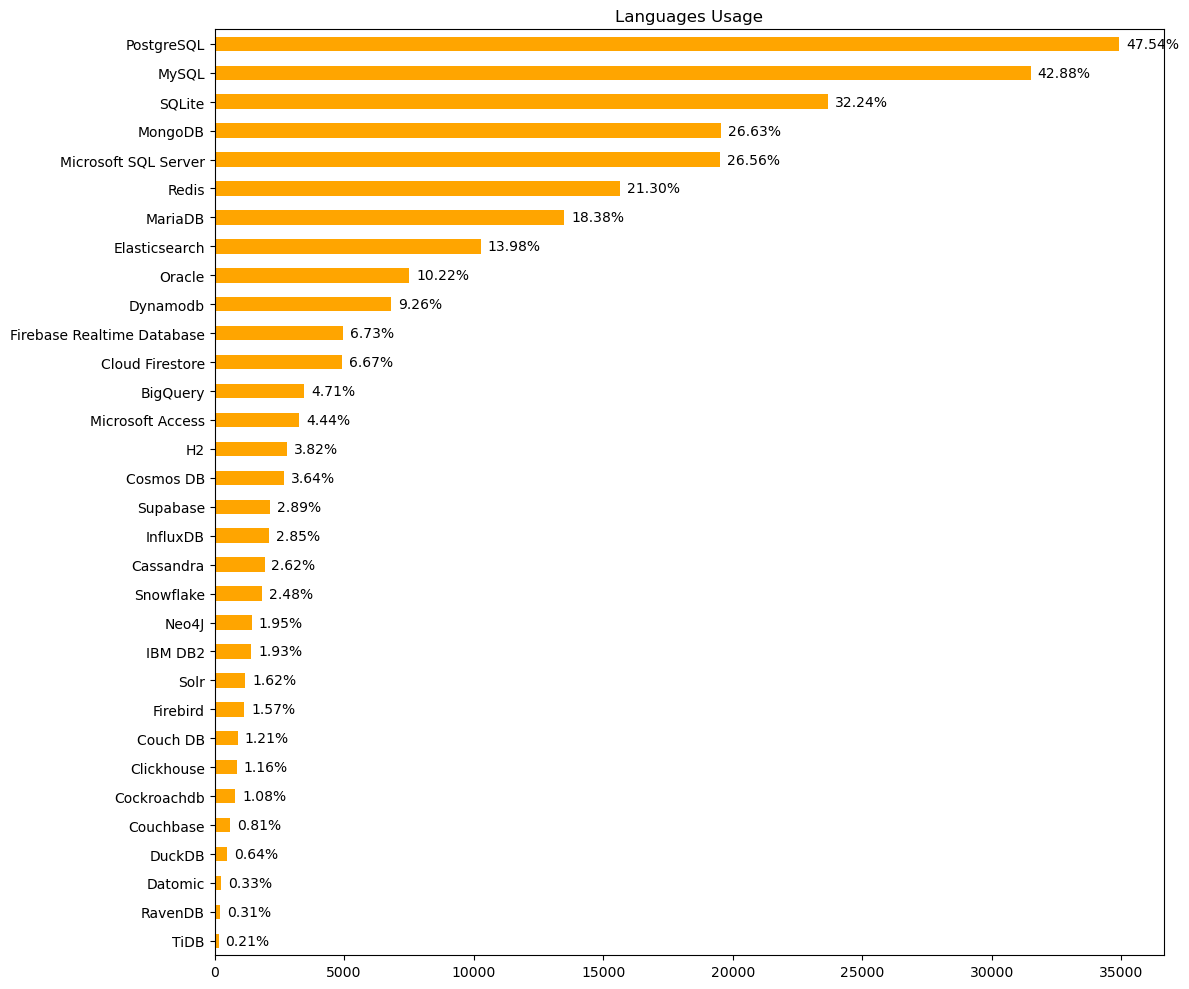

In [23]:
databases = df['DatabaseHaveWorkedWith'].str.split(';').explode()
databases_counts = databases.value_counts().sort_values(ascending=True)
total_respondents = df['DatabaseHaveWorkedWith'].notna().sum()

ax = databases_counts.plot(kind='barh', figsize=(12, 10), color='orange')
plt.title('Languages Usage')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    percentage = f"{100 * p.get_width() / total_respondents:.2f}%"
    ax.annotate(f"{percentage}", (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()